# JSC270 - Class \#2

## Prof. Taback

# Today's Class

- Data wrangling: 
   - selecting variables
   - filtering rows
   - creating new variables
   - sorting
   - summarizing by-group
   - combining multiple tables
- Summarizing Data 
- Data transformation

# Data Wrangling

- Data wrangling/manipulation/transformation has a large impact on the data used to answer questions with data.

- Statistical and machine learning models are meaningful only if the data is meaningful.

- Data wrangling/manipulation is one point in the data analysis process where decisions can introduce bias into the data.  Examples?

<a href='https://www.nytimes.com/interactive/2019/01/11/us/politics/trump-border-crisis-reality.html'> <img src='trumpnyt.png'> </img> </a>

# pandas

# Series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data

In [2]:
import pandas as pd

myseries = pd.Series([0.9, 0.7, -10, 20])
print(myseries)
prov = ['Manitoba', 'Ontario', 'Quebec', 'Alberta']
myseries.index = prov
myseries

0     0.9
1     0.7
2   -10.0
3    20.0
dtype: float64


Manitoba     0.9
Ontario      0.7
Quebec     -10.0
Alberta     20.0
dtype: float64

# pandas DataFrame

- A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 

- The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.

- Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. 

(McKinney, 2018 and [pandas ref](https://pandas.pydata.org))

In [2]:
# a dict of equal length lists
pop = {'province':['Ontario', 'Ontario', 'Quebec', 'Quebec'], 
        'year': [2016, 2011,2016, 2011],
        'pop_size': [13448494, 12851821, 8164361, 7903001]}
df = pd.DataFrame(pop)
df

,province,year,pop_size
0,Ontario,2016,13448494
1,Ontario,2011,12851821
2,Quebec,2016,8164361
3,Quebec,2011,7903001


- pandas can read and write data in many types of formats (text, binary, SQL) that are stored as csv, json, html, etc.  (see [IO tools](http://pandas.pydata.org/pandas-docs/stable/io.html) )

- For example, `read_html` accepts an HTML string/file/URL and will parse an HTML tables into a list of pandas DataFrames.

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
df = pd.read_html(url, header=0)
pop = df[1] # select table of countries
pop.head()

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
0,—,World,—,—,7466964280,7550262101,+1.1%
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,+0.4%
2,2,India,Asia,Southern Asia,1324171354,1339180127,+1.1%
3,3,United States,Americas,Northern America,322179605,324459463,+0.7%
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,+1.1%


# Filtering rows (observations)

- Exclude the row with the world population.

- `pop[1:]` excludes the first row.

- This uses "slice" syntax.


In [4]:
pop[1:].head()

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,+0.4%
2,2,India,Asia,Southern Asia,1324171354,1339180127,+1.1%
3,3,United States,Americas,Northern America,322179605,324459463,+0.7%
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,+1.1%
5,5,Brazil,Americas,South America,207652865,209288278,+0.8%


Select countries that have populations that rank between 30th and 35th.

In [5]:
pop[1:][29:35]

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
30,30,Spain[d],Europe,Southern Europe,46347576,46354321,NaN
31,31,Argentina,Americas,South America,43847430,44271041,+1.0%
32,32,Ukraine[e],Europe,Eastern Europe,44438625,44222947,−0.5%
33,33,Uganda,Africa,Eastern Africa,41487965,42862958,+3.3%
34,34,Algeria,Africa,Northern Africa,40606052,41318142,+1.8%
35,35,Sudan,Africa,Northern Africa,39578828,40533330,+2.4%


Use `.loc` to select by row index and column name.  What is the change in population for the country of rank 30?

In [6]:
pop.loc[30,'Change']

nan

Modify values in place using `.loc`.

In [7]:
pop.loc[30,'Change'] = '0.0%'
pop.loc[30,'Change']

'0.0%'

We can also select rows using integers with `iloc`.  The 7th column has index value 6.

In [8]:
pop.iloc[30,6]

'0.0%'

We can also use boolean logic to select rows.

In [9]:
pop[1:][(pd.to_numeric(pop['Rank'][1:]) >= 10) & (pd.to_numeric(pop['Rank'][1:]) <= 20)]

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
10,10,Mexico,Americas,Central America,127540423,129163276,+1.3%
11,11,Japan,Asia,Eastern Asia,127748513,127484450,−0.2%
12,12,Ethiopia,Africa,Eastern Africa,102403196,104957438,+2.5%
13,13,Philippines,Asia,South-eastern Asia,103320222,104918090,+1.5%
14,14,Egypt,Africa,Northern Africa,95688681,97553151,+1.9%
15,15,Vietnam,Asia,South-eastern Asia,94569072,95540800,+1.0%
16,16,Germany,Europe,Western Europe,81914672,82114224,+0.2%
17,17,Democratic Republic of the Congo,Africa,Middle Africa,78736153,81339988,+3.3%
18,18,Iran,Asia,Southern Asia,80277428,81162788,+1.1%
19,19,Turkey,Asia,Western Asia,79512426,80745020,+1.6%


# Selecting variables (columns)


- `pop['Rank']` returns a pandas series (i.e., data frame with one column).


In [10]:
pop['Rank'].head()

0    —
1    1
2    2
3    3
4    4
Name: Rank, dtype: object

# Creating New Variables

Suppose we want to add a new variable to the data frame to indicate if a countries' change in population has magnitude greater than 3% (i.e., change $\geq$ 3% or change $\leq$ -3%).


In [206]:
pop[1:]['Change'].describe()

count       230
unique       49
top       +1.3%
freq         14
Name: Change, dtype: object

- Several values of change were not correctly read in since there are no missing values in the Wikipedia [table](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)).
- Let's search for missing values in `Change` column and change to 0.0%. 
- Use `.fillna()` to fill in missing values with '0.0%'.


In [212]:
pop[1:]['Change'].isna().sum() # count missing values 

3

In [211]:
pop['Change'].fillna('0.0%').isna().sum() # count missing values 

0

- But, `Change` isn't numeric.  
- So, it needs to be converted from string to numeric if we are going to measure magnitude of change. 
- Now replace '+' and '%' with empty character using a regular expression in `.replace()`.
- Form a regular expression.
- These operations can be combined or "chained" together.

In [13]:
pop['Change'].fillna('0.0%').replace('\+|\%','', regex = True).astype(float)

ValueError: could not convert string to float: '−1.1'

- What's going on?
- Time for some investigation.

In [213]:
(pop['Change']
 .fillna('0.0%')
 .replace('\+|\%','', regex = True)[1:9]
 .astype(float))

1    0.4
2    1.1
3    0.7
4    1.1
5    0.8
6    2.0
7    2.6
8    1.1
Name: Change, dtype: float64

In [215]:
(pop['Change']
 .fillna('0.0%')
 .replace('\+|\%','', regex = True)[1:10]
 .astype(float))

ValueError: could not convert string to float: '−2.0'

In [216]:
# failed in 10th row
pop['Change'].fillna('0.0%').replace('\+|\%','', regex = True).iloc[9]

'−2.0'

In [217]:
# print unicode code
print(ord(pop['Change'].fillna('0.0%').replace('\+|\%','', regex = True).iloc[9][0])) 
ord('-') # minus sign


8722


45

In [218]:
# use () to break chaining on different lines

ch1 = ord(pop['Change']
          .fillna('0.0%')
          .replace('\+|\%','', regex = True)
          .iloc[9][0])

(pop['Change']
 .fillna('0.0%')
 .replace('\+|\%','', regex = True)
 .replace(chr(ch1),'-', regex = True)
 .astype(float)).head()

0    1.1
1    0.4
2    1.1
3    0.7
4    1.1
Name: Change, dtype: float64

In [219]:
# now create new variable 

x = (pop['Change']
     .fillna('0.0%')
     .replace('\+|\%','', regex = True)
     .replace(chr(ch1),'-', regex = True)
     .astype(float))

pop['Change2'] = np.where((x >= 3) | (x <= -3),'high','low')

pop[['Rank','Country or area','Change2']].head()

,Rank,Country or area,Change2
0,—,World,low
1,1,China[a],low
2,2,India,low
3,3,United States,low
4,4,Indonesia,low


# Movies in 2018

**Questions:** 

- What is the distribution of box office revenue in 2018?
- Is the distribution different by country?
- Is there a relationship between the two ratings from imdb and metacritic? 

The Wikipedia page [2018 in film](https://en.wikipedia.org/wiki/2018_in_film) lists films in 2018.

<img src='2018films.png' height="400" width="500" ></img>

How many films are listed?  The films are in a table so let's try to read the table into pandas.

The pandas function `read_html` can read HTML tables into a list of DataFrame objects. 

In [220]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/2018_in_film'
df = pd.read_html(url, header=0, attrs = {"class":"wikitable sortable"})
df[1] #returns a list of DFs

,Opening,Title,Studio,Cast and crew,Genre,Country,Ref.,Unnamed: 7
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions,Adam Robitel (director); Leigh Whannell (scree...,"Horror, Thriller",US,[38]
1,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,Drama,US,[39],NaN,NaN
2,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...","Action, Thriller","IT, UK",[40],NaN,NaN
3,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",Drama,AUS,[41],NaN
4,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,"Action, Crime, Drama, Mystery, Thriller","US, UK",[42],NaN
5,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...","Action, Thriller",US,[43],NaN,NaN
6,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,"Action, Thriller",US,[44],NaN,NaN
7,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, ...",Drama,US,[45],NaN,NaN
8,Humor Me,Shout! Factory / Shout! Studios,Sam Hoffman (director/screenplay); Jemaine Cle...,Comedy,US,[46],NaN,NaN
9,Vazante,Music Box Films,Daniela Thomas (director/screenplay); Beto Ama...,"Historical, Adventure, Drama","BR, PT",[47],NaN,NaN


- `read_html` didn't parse the table properly.

>Expect to do some cleanup after you call this function. For example, you might need to manually assign column names if the column names are converted to NaN when you pass the header=0 argument. We try to assume as little as possible about the structure of the table and push the idiosyncrasies of the HTML contained in the table to the user (see `pandas.read_html` [API ref](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html)).

- Cleaning this table requires selecting cells manually. 
- The information we need from this table are film titles.

<img src='itag.png' height="400" width="500" ></img>

In [9]:
# we just want the movie names
from urllib.request import urlopen
from bs4 import BeautifulSoup

webpage = 'https://en.wikipedia.org/wiki/2018_in_film'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

# css selection 
# select all <i> tag elements within <td> within <tr> elements 
# within <tbody> elements see 
# https://www.w3schools.com/cssref/css_selectors.asp 

movie=soup.select('tbody tr td i') 
movie # returns a list of <i> tag elements on the page

# extract text part of tag using 
# list comprehension
names = [m.get_text() for m in movie] 

names

# by inspection we see rows 25:291
# correspond to movie names

mnames= names[25:291]
print(mnames[0:2])
len(mnames)

['First Reformed', 'Spider-Man: Into the Spider-Verse']


266

<a href='http://www.omdbapi.com'> <img src='omdb.png' height="600" width="800" ></img> </a>

Install Python package [omdb](https://pypi.org/project/omdb/) using `pip` or access the API directly.

In [17]:
#install omdb using pip

import omdb

API_KEY = ''

omdb.set_default('apikey', API_KEY)
movie1 = omdb.title(mnames[0])
movie1 #returns a dict

{'actors': 'Lin Shaye, Leigh Whannell, Angus Sampson, Kirk Acevedo',
 'awards': 'N/A',
 'box_office': '$29,581,355',
 'country': 'Canada, USA',
 'director': 'Adam Robitel',
 'dvd': '03 Apr 2018',
 'genre': 'Horror, Mystery, Thriller',
 'imdb_id': 'tt5726086',
 'imdb_rating': '5.7',
 'imdb_votes': '36,825',
 'language': 'English',
 'metascore': '49',
 'plot': 'Parapsychologist Dr. Elise Rainier faces her most fearsome and personal haunting yet, as she is drawn back to her ghostly childhood home, where the terror began.',
 'poster': 'https://m.media-amazon.com/images/M/MV5BMTUxODU0NjQ2Nl5BMl5BanBnXkFtZTgwMTc4NDQ0MzI@._V1_SX300.jpg',
 'production': 'Universal Pictures',
 'rated': 'PG-13',
 'ratings': [{'source': 'Internet Movie Database', 'value': '5.7/10'},
  {'source': 'Rotten Tomatoes', 'value': '32%'},
  {'source': 'Metacritic', 'value': '49/100'}],
 'released': '05 Jan 2018',
 'response': 'True',
 'runtime': '103 min',
 'title': 'Insidious: The Last Key',
 'type': 'movie',
 'website'

In [18]:
print(movie1['actors'], '\n \n', movie1['box_office'])

Lin Shaye, Leigh Whannell, Angus Sampson, Kirk Acevedo 
 
 $29,581,355


In [19]:
# easy to import directly into pandas
import pandas as pd
pd.DataFrame(movie1)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response
0,Insidious: The Last Key,2018,PG-13,05 Jan 2018,103 min,"Horror, Mystery, Thriller",Adam Robitel,"Leigh Whannell, Leigh Whannell (based on chara...","Lin Shaye, Leigh Whannell, Angus Sampson, Kirk...",Parapsychologist Dr. Elise Rainier faces her m...,...,49,5.7,"36,825",tt5726086,movie,03 Apr 2018,"$29,581,355",Universal Pictures,http://www.insidiousmovie.com/,True
1,Insidious: The Last Key,2018,PG-13,05 Jan 2018,103 min,"Horror, Mystery, Thriller",Adam Robitel,"Leigh Whannell, Leigh Whannell (based on chara...","Lin Shaye, Leigh Whannell, Angus Sampson, Kirk...",Parapsychologist Dr. Elise Rainier faces her m...,...,49,5.7,"36,825",tt5726086,movie,03 Apr 2018,"$29,581,355",Universal Pictures,http://www.insidiousmovie.com/,True
2,Insidious: The Last Key,2018,PG-13,05 Jan 2018,103 min,"Horror, Mystery, Thriller",Adam Robitel,"Leigh Whannell, Leigh Whannell (based on chara...","Lin Shaye, Leigh Whannell, Angus Sampson, Kirk...",Parapsychologist Dr. Elise Rainier faces her m...,...,49,5.7,"36,825",tt5726086,movie,03 Apr 2018,"$29,581,355",Universal Pictures,http://www.insidiousmovie.com/,True


Iterate through list of movie names and store select values in a list 

In [20]:
movie_list = []
for name in mnames[0:50]:
    moviedat = omdb.title(name, timeout=5)
    if moviedat['response'] == "True":
        values = [moviedat['box_office'], moviedat['genre'], moviedat['imdb_rating'], 
                  moviedat['imdb_votes'], moviedat['title'], moviedat['metascore'], 
                  moviedat['year'], moviedat['language'], moviedat['country']]
    movie_list.append(values)

In [21]:
movie_list[0]

['$29,581,355',
 'Horror, Mystery, Thriller',
 '5.7',
 '36,825',
 'Insidious: The Last Key',
 '49',
 '2018',
 'English',
 'Canada, USA']

Store movie list in a pandas data frame.

In [22]:
movie_list
cols = ['box_office', 'genre', 'imdb_rating', 'imdb_votes', 
        'title', 'metascore','year', 'language', 'country']
moviedf = pd.DataFrame(movie_list, columns = cols)
#moviedf.to_csv('50movies.csv')
moviedf.head()

,box_office,genre,imdb_rating,imdb_votes,title,metascore,year,language,country
0,"$29,581,355","Horror, Mystery, Thriller",5.7,"36,825",Insidious: The Last Key,49,2018,English,"Canada, USA"
1,N/A,"Drama, Thriller",5.0,"1,806",The Strange Ones,57,2017,English,USA
2,N/A,"Action, Thriller",4.8,"3,129",Stratton,26,2017,English,UK
3,N/A,"Adventure, Crime, Drama, History, Thriller",6.8,"4,439",Sweet Country,87,2017,"English, Aboriginal",Australia
4,"$36,241,300","Action, Crime, Drama, Mystery, Thriller",6.3,"70,930",The Commuter,56,2018,"English, Spanish","France, USA"


In [23]:
moviedf.dtypes

box_office     object
genre          object
imdb_rating    object
imdb_votes     object
title          object
metascore      object
year           object
language       object
country        object
dtype: object

# Variables

- `box_office` is an example of a continuous variable.
- `genre` is an example of a nominal (unordered) categorical variable.
- `year` is an example of an ordered categorical variable.

# Statistical descriptions of variables

- The most common value of a continuous variable is often measured by mean, median, mode, or other percentiles.
- The variation of a continuous variable is often measured by variance/standard deviation or interquartile range.
- Counts and frequencies are often used to describe categorical variables.

In [30]:
import numpy as np

# remove $ and , from numbers 
moviedf_clean = moviedf.replace('N/A', np.NaN).replace('\$|,','',regex=True)

moviedf_clean['box_office'].astype(float).describe()


count    2.000000e+01
mean     5.107472e+07
std      1.092403e+08
min      5.233000e+03
25%      5.054648e+06
50%      2.259529e+07
75%      3.835106e+07
max      5.011050e+08
Name: box_office, dtype: float64

# Plotting with pandas

pandas has built in methods that simplify creating visualizations from DataFrame and Series objects.

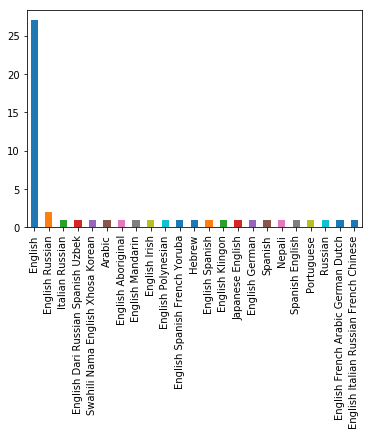

In [32]:
import matplotlib.pyplot as plt

plt.figure()
moviedf_clean['language'].value_counts().plot(kind = 'bar');

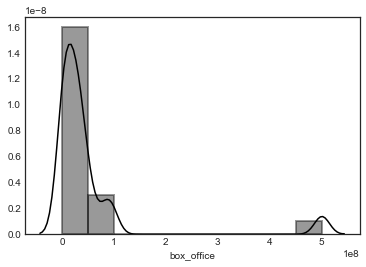

In [224]:
import seaborn as sns

sns.distplot(moviedf_clean['box_office']
             .astype(float).dropna(),
             hist_kws=dict(edgecolor="k", linewidth=2), kde=True, bins=10, color = "black");

# Data Transformations

- It's often convenient to transform data using a function $f(\cdot)$.
- Examples: $f(x)=\log_{10}(x), \hspace{0.1cm} x>0$; $f(x)=\frac{x}{1-x}, \hspace{0.1cm} 0<x<1$.
- To implement transformations in pandas use the `apply` method with a `lambda` function.

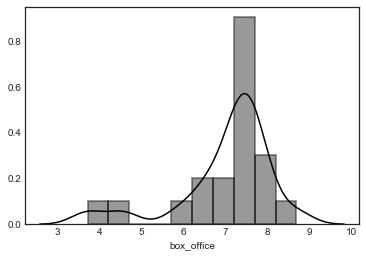

In [222]:
import seaborn as sns

sns.distplot(moviedf_clean['box_office'] 
             .astype(float).dropna()
             .apply(lambda x: np.log10(x)),  #apply log transform to each element of series
             hist_kws=dict(edgecolor="k", linewidth=2), kde=True, bins=10, color = "black");

- A histogram is a visual summary of the distribution of a continuous variable.  
- The smooth line superimposed on the plot is the kernel density estimate of the distribution.
- The keyword `kde = True` adds this to `distplot`. 

# Mathematical Definition of the Histogram

- The bins of the histograms are the intervals: $[x_0+mh,x_0+(m+1)h]$, where $x_0$ is the origin, $m \in \mathbb{Z}$, and $h= (x_0+(m+1)h) - (x_0+mh)$ is the bin width.

- The bins can be used to construct rectangles with width h and height $\hat f(x)$.  So the area of these rectangles are: $h \hat f(x).$

- The area is the same as the proportion of data in the same bin as $x$.

- So, given $n$ observations $x_1, x_2, \ldots, x_n$:  

$$h \hat f(x) = \frac{\#\{x_i \text{ in same bin as } x\}}{n}$$.

- $\hat f(x)$ is called the histogram estimator, an estimate of the density at $x$.

# Kernel Density Estimation

- The histogram can be centered on a point $x$: $$ \hat f(x) = \frac{\# \{ x_i \in(x-h,x+h )\}}{2hn}.$$

- This is called the naive estimator of the density.

- Define the weight function $w(x)$ by:

$$w(x) =
\left\{
	\begin{array}{ll}
		1/2  & \mbox{if } |x|<1  \\
		0 & \mbox{if } |x| \geq 1.
	\end{array}
\right.$$

Then the naive estimator can be written (**exercise**):

$$\hat f(x) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h}w\left(\frac{x-x_i}{h} \right).$$ 

# Kernel Density Estimation

Replace the weight function is by a kernel function $K(x) \geq 0$ which satisfies $\int_{-\infty}^{\infty}K(x)dx=1$.  The kernel estimator of the density function is defined by:

$$\hat f(x) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h}K\left(\frac{x-x_i}{h} \right),$$

where $h$ is called the bandwidth.

For example the Gaussian kernel is:

$$K(x) = \frac{1}{\sqrt{2\pi}}\exp(-x^2/2), -\infty < x < \infty.$$

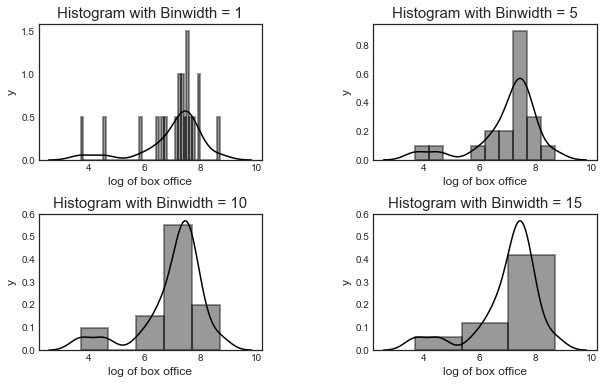

In [227]:
x= (moviedf_clean['box_office']
             .astype(float).dropna()
             .apply(lambda x: np.log10(x)))

fig = plt.figure(figsize=(10,6)) #set fig size
fig.subplots_adjust(hspace=0.4, wspace=0.5) # set space between subplots

for i, binwidth in enumerate([1, 5, 10, 15]):
    ax = plt.subplot(2, 2, i + 1)   # Set up the plot
    sns.distplot(x, hist_kws=dict(edgecolor="k", linewidth=2), 
                 kde=True, bins=int(50/binwidth), color = "black", ax=ax)
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('log of box office', size = 12)
    ax.set_ylabel('y', size= 12)
plt.show()

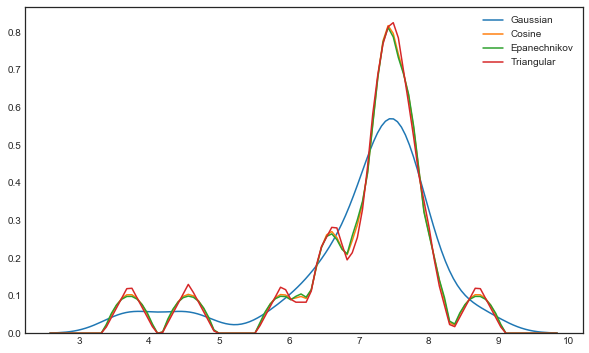

In [203]:
x= (moviedf_clean['box_office']
    .astype(float).dropna()
    .apply(lambda x: np.log10(x)))

fig, ax = plt.subplots(figsize = (10,6))

sns.kdeplot(x, kernel = 'gau',  label = 'Gaussian')
sns.kdeplot(x, kernel = 'cos',  label = 'Cosine')
sns.kdeplot(x, kernel = 'epa',  label = 'Epanechnikov')
sns.kdeplot(x, kernel = 'tri',  label = 'Triangular')

leg = ax.legend()

# Summarizing by Group

- It's often interesting to look at various statistics/models by sub-groups.
- To implement in pandas we can use the `.groupby` method.

In [122]:
(moviedf_clean['box_office']
 .astype(float)
 .dropna()
 .groupby(moviedf_clean['country'])
 .mean().round(0))

country
Australia USA                              24553838.0
Canada USA                                 29581355.0
Chile Germany Spain USA                      806746.0
France USA                                 36241300.0
Israel Switzerland Germany France             36786.0
Italy Soviet Union                             5233.0
Mexico                                      2675608.0
South Africa USA                            4436089.0
UK USA                                     20636742.0
USA                                        35261701.0
USA Australia                              84060376.0
USA South Africa South Korea Australia    501105037.0
Name: box_office, dtype: float64

In [123]:
(moviedf_clean['box_office']
 .astype(float)
 .dropna()
 .groupby(moviedf_clean['country'])
 .count())

country
Australia USA                             1
Canada USA                                1
Chile Germany Spain USA                   1
France USA                                1
Israel Switzerland Germany France         1
Italy Soviet Union                        1
Mexico                                    1
South Africa USA                          1
UK USA                                    1
USA                                       9
USA Australia                             1
USA South Africa South Korea Australia    1
Name: box_office, dtype: int64

# Relationship between movie ratings

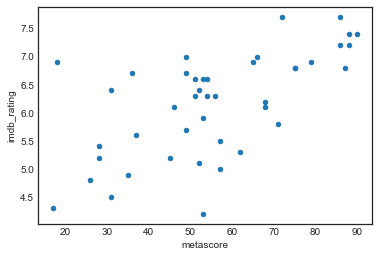

In [124]:
(moviedf_clean[['imdb_rating', 'metascore']].
 astype(float).
 plot.scatter(x = 'metascore', y = 'imdb_rating'));

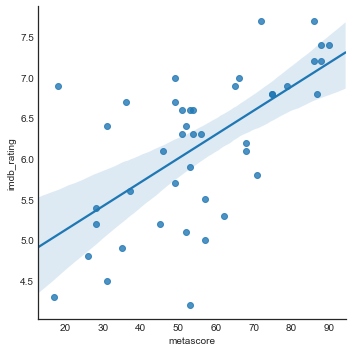

In [125]:
moviedf_clean[['imdb_rating', 'metascore']] = (moviedf_clean[['imdb_rating', 'metascore']]
                                               .astype(float))

sns.lmplot(x = 'metascore', y = 'imdb_rating', data = moviedf_clean);

# Merging or Joining DataFrames

In [232]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [229]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [231]:
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [233]:
pd.merge(df1, df2, how= 'inner', on = 'key') # only key combinations in both tables

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [234]:
pd.merge(df1, df2, how= 'left', on = 'key') # use all key combinations in left tables

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


See pandas [documentation on joining/merging](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) for more options.